In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

In [2]:
# Window functions are like aggregation functions
# You can use them in conjunction with .resample() which will soon be a deferred operation

In [3]:
df = pd.DataFrame(np.random.randn(600, 3), index = pd.date_range('7/1/2016', freq = 'S', periods = 600), columns = ['A', 'B', 'C'])
df.head()

,A,B,C
2016-07-01 00:00:00,0.852279,1.399277,0.638182
2016-07-01 00:00:01,-0.400286,1.076288,0.635114
2016-07-01 00:00:02,-0.173372,-0.635011,-0.342660
2016-07-01 00:00:03,-0.197394,0.234053,-0.366100
2016-07-01 00:00:04,0.482805,1.611366,-0.214020


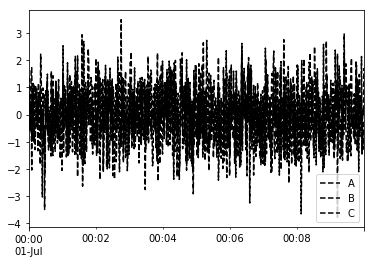

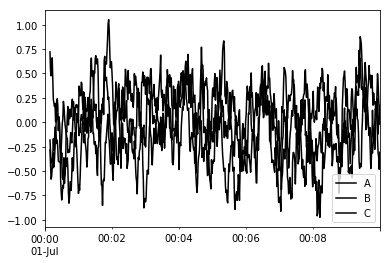

In [4]:
#pd.rolling_mean(df, window = 2)[1:10] # in future versions you want to resample separately
r = df.rolling(window = 10)
#r.agg, r.apply, r.count, r.exclusions, r.max, r.median, r.name, r.quantile, r.kurt, r.cov, r.corr, r.aggregate, r.std, r.skew, r.sum, r.var
df.plot(style = 'k--')
r.mean().plot(style = 'k')

In [5]:
#exponentially weighted
pd.ewma(df, span = 15, min_periods = 2)[1:10]

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pd.ewm_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.ewm(span=15,min_periods=2,adjust=True,ignore_na=False).mean()
  


,A,B,C
2016-07-01 00:00:01,0.184244,1.227016,0.636546
2016-07-01 00:00:02,0.048816,0.521870,0.265722
2016-07-01 00:00:03,-0.025556,0.434930,0.074871
2016-07-01 00:00:04,0.104903,0.736834,0.000734
2016-07-01 00:00:05,-0.141564,0.960453,-0.462533
2016-07-01 00:00:06,-0.088425,0.746992,-0.178264
2016-07-01 00:00:07,-0.007485,0.823177,-0.201196
2016-07-01 00:00:08,-0.154470,0.607010,-0.320959
2016-07-01 00:00:09,-0.305013,0.692147,-0.420829


In [6]:
# can also easily plot a rolling average per column
df = pd.DataFrame(np.random.randn(1000, 4), index = pd.date_range('6/6/16', periods = 1000), columns = ['A', 'B', 'C', 'D'])

In [7]:
df.head()

,A,B,C,D
2016-06-06,-0.961613,0.061842,1.261147,-0.054822
2016-06-07,-1.262913,2.050353,-0.080224,-0.408012
2016-06-08,0.238089,-0.188463,0.067669,-2.275793
2016-06-09,1.133264,1.115287,0.784098,0.235883
2016-06-10,-0.204514,0.668397,0.432588,-0.613186


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000015918978240>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000015918A675F8>], dtype=object)

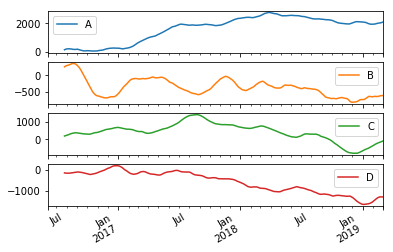

In [8]:
df = df.cumsum()
df.rolling(window = 50).sum().plot(subplots=True)

In [9]:
# What about a custom function?
df.rolling(window = 10).apply(lambda x: np.fabs(x - x.mean()).mean())

,A,B,C,D
2016-06-06,NaN,NaN,NaN,NaN
2016-06-07,NaN,NaN,NaN,NaN
2016-06-08,NaN,NaN,NaN,NaN
2016-06-09,NaN,NaN,NaN,NaN
2016-06-10,NaN,NaN,NaN,NaN
2016-06-11,NaN,NaN,NaN,NaN
2016-06-12,NaN,NaN,NaN,NaN
2016-06-13,NaN,NaN,NaN,NaN
2016-06-14,NaN,NaN,NaN,NaN
2016-06-15,1.163501,0.989958,0.904970,0.904629


In [10]:
# Expanding windows
# Yields the value of the statistic with all the data available up to that point in time
df.expanding(min_periods = 1).mean()[1:5]

,A,B,C,D
2016-06-07,-1.593069,1.087018,1.221035,-0.258828
2016-06-08,-1.724192,1.365923,1.230221,-1.085428
2016-06-09,-1.506437,1.784197,1.430838,-1.439757
2016-06-10,-1.416687,2.168840,1.637726,-1.774991


In [11]:
# Will an expanding window provide a more or less stable statistic than a rolling statistic? 
# When might one vs. the other be appropriate?

A rolling window provides a more stable statistic that expanding window, but an expanding window shows the entire trend from the beginning.

In [12]:
# EWMA
# Why use EWMA?

Use an EWMA to detect small shifts in the mean.

In [13]:
# Go do it!
# pandas.pydata.org/pandas-docs/stable/computation.html#stats-aggregate

In [14]:
r = df.rolling(window=60,min_periods=1)
r.aggregate(np.sum).head(10)

,A,B,C,D
2016-06-06,-0.961613,0.061842,1.261147,-0.054822
2016-06-07,-3.186139,2.174036,2.442070,-0.517656
2016-06-08,-5.172576,4.097768,3.690662,-3.256283
2016-06-09,-6.025749,7.136787,5.723351,-5.759027
2016-06-10,-7.083437,10.844202,8.188629,-8.874957
2016-06-11,-8.314989,15.366799,11.628863,-11.425415
2016-06-12,-7.953487,19.737256,14.446411,-12.668498
2016-06-13,-7.867236,23.341762,17.495337,-14.253904
2016-06-14,-5.790701,26.394061,21.477618,-16.997503
2016-06-15,-4.162477,30.158519,25.426959,-18.256426


In [15]:
# Come up with a series that shows how EWMA and Rolling can importantly differ even with the same window setting

In [16]:
pd.ewma(df["A"], span=60, freq="D").tail(5)

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=60,min_periods=0,freq=D,adjust=True,ignore_na=False).mean()
  """Entry point for launching an IPython kernel.


2019-02-26    41.922130
2019-02-27    41.979267
2019-02-28    42.077304
2019-03-01    42.204882
2019-03-02    42.316292
Freq: D, Name: A, dtype: float64

In [17]:
r = df.rolling(window=60,min_periods=1)
r.aggregate(np.sum).tail(5)

,A,B,C,D
2019-02-26,2447.263242,-761.559839,-198.273318,-1576.550131
2019-02-27,2451.665142,-761.946171,-186.998192,-1569.699527
2019-02-28,2456.658983,-761.966081,-177.937438,-1563.736214
2019-03-01,2462.311937,-760.672291,-167.535268,-1558.093202
2019-03-02,2467.320829,-757.620095,-158.504963,-1552.116804
